In [3]:
import os
print(os.getcwd())
import matplotlib.pyplot as plt
from dataloader_baseline import MVTecBaselineDataset
# from dataloader_perlin import MVTecPerlinDataset
from dataloader_cutpaste import MvtecCutPaste
from torch.utils.data import DataLoader
import random
import torch

/home/sameerhashmi36/Documents/AVS7/anomaly_detection_computer_vision/DRAEM


In [10]:
# Set Paths
root_dir = "../datasets/mvtec/bottle/"  # Change this to your dataset path
anomaly_source_path = "../datasets/dtd/images"   # Path for anomaly source
resize_shape = (256, 256) 

In [11]:
baseline_dataset = MVTecBaselineDataset(root_dir=root_dir, resize_shape=resize_shape)
# perlin_dataset = MVTecPerlinDataset(root_dir=root_dir, anomaly_source_path=anomaly_source_path, resize_shape=resize_shape)
cutpaste_dataset = MvtecCutPaste(root_dir=root_dir, resize_shape=resize_shape)


In [12]:
# Function to Visualize a Sample
def visualize_sample(sample, title):
    image = sample['image']
    augmented_image = sample.get('augmented_image', None)
    anomaly_mask = sample.get('anomaly_mask', None)

    # Original Image
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image[0].numpy().transpose(1, 2, 0))
    plt.title("Original Image")
    plt.axis("off")

    # Augmented Image (if available)
    if augmented_image is not None:
        plt.subplot(1, 3, 2)
        plt.imshow(augmented_image[0].numpy().transpose(1, 2, 0))
        plt.title("Augmented Image")
        plt.axis("off")

    # Anomaly Mask (if available)
    if anomaly_mask is not None:
        plt.subplot(1, 3, 3)
        plt.imshow(anomaly_mask[0].numpy(), cmap="gray")
        plt.title("Anomaly Mask")
        plt.axis("off")

    plt.suptitle(title)
    plt.show()

In [13]:
# DataLoaders
baseline_loader = DataLoader(baseline_dataset, batch_size=1, shuffle=True)
# perlin_loader = DataLoader(perlin_dataset, batch_size=1, shuffle=True)
cutpaste_loader = DataLoader(cutpaste_dataset, batch_size=1, shuffle=True)

ValueError: num_samples should be a positive integer value, but got num_samples=0

Baseline Dataset:


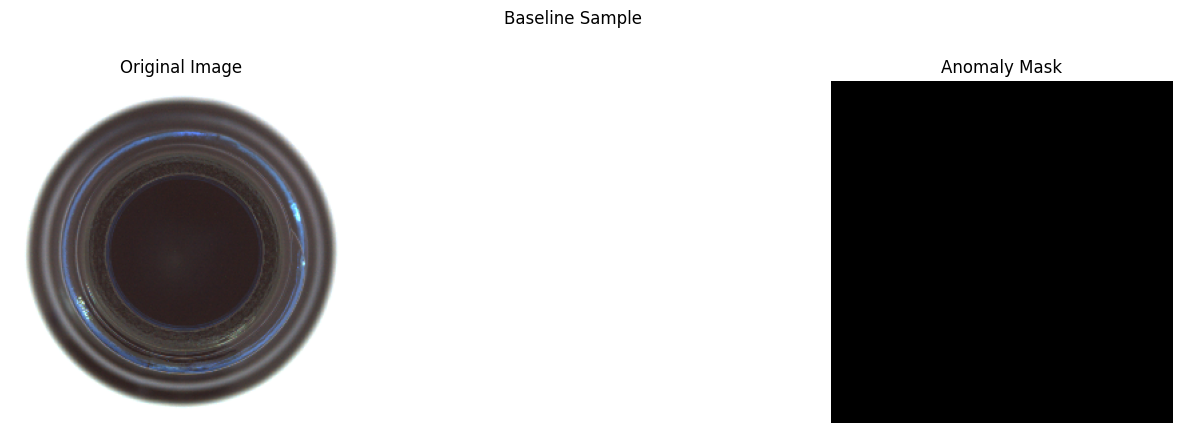

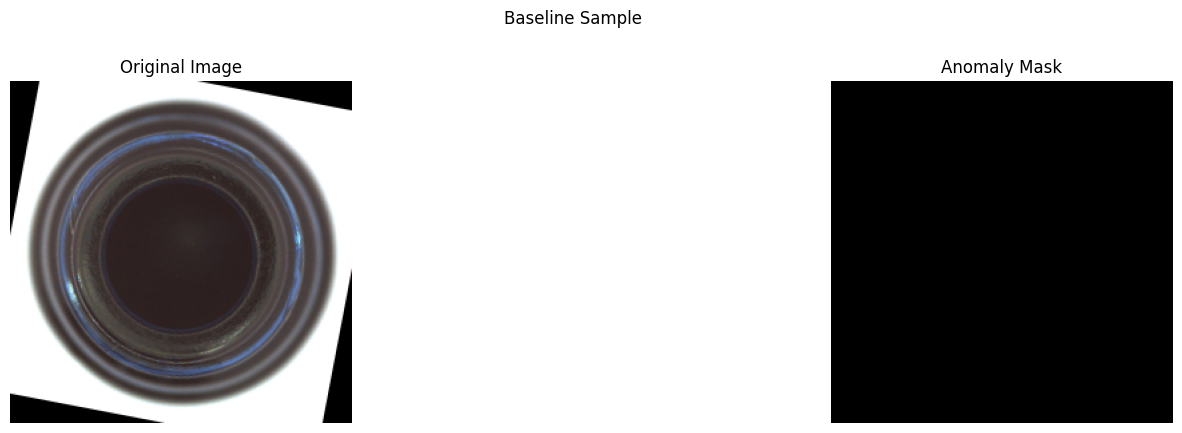

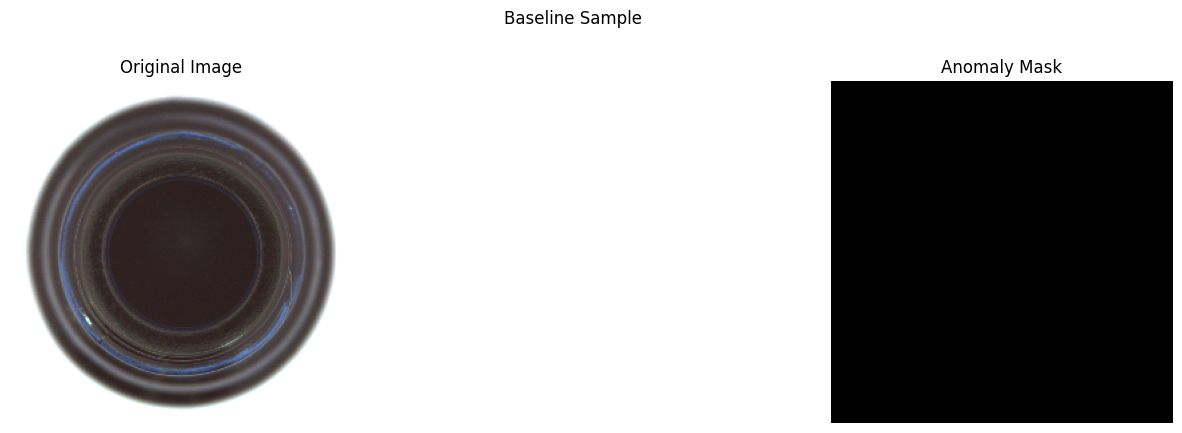

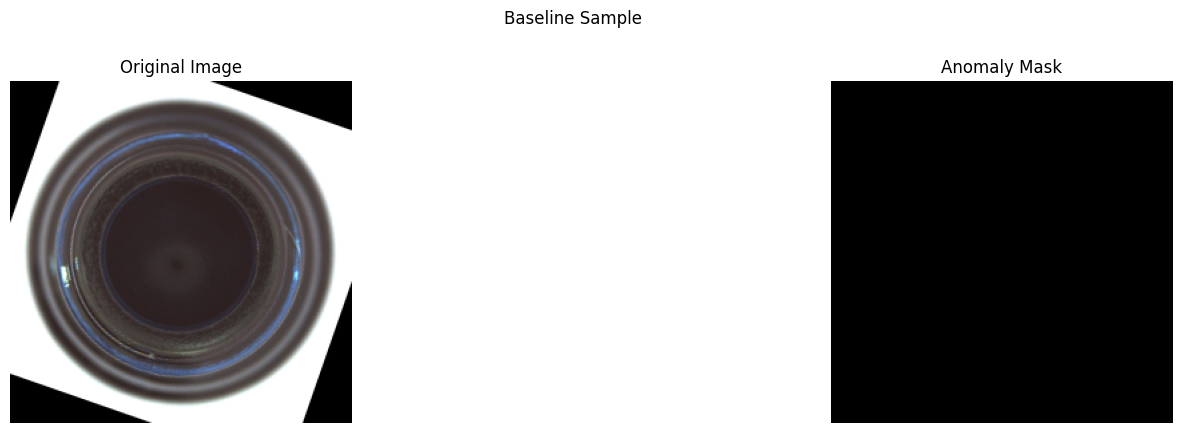

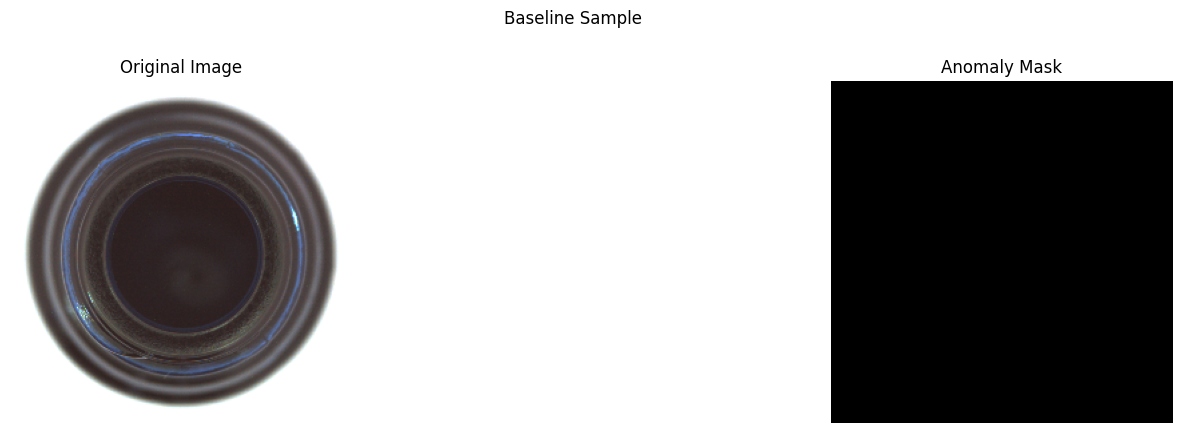

Perlin Dataset:
Image shape: (3, 256, 256)
Anomaly source shape: (256, 256, 3)
Perlin noise shape: (256, 256)
Perlin threshold shape: (3, 256, 256)
Augmented image shape: (3, 256, 256)
Anomaly mask shape: (256, 256)


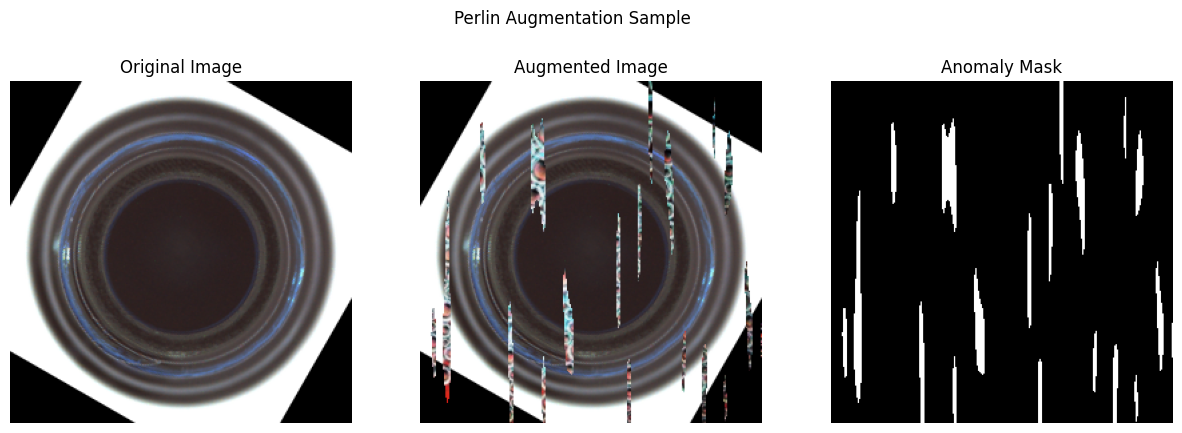

Image shape: (3, 256, 256)
Anomaly source shape: (256, 256, 3)
Perlin noise shape: (256, 256)
Perlin threshold shape: (3, 256, 256)
Augmented image shape: (3, 256, 256)
Anomaly mask shape: (256, 256)


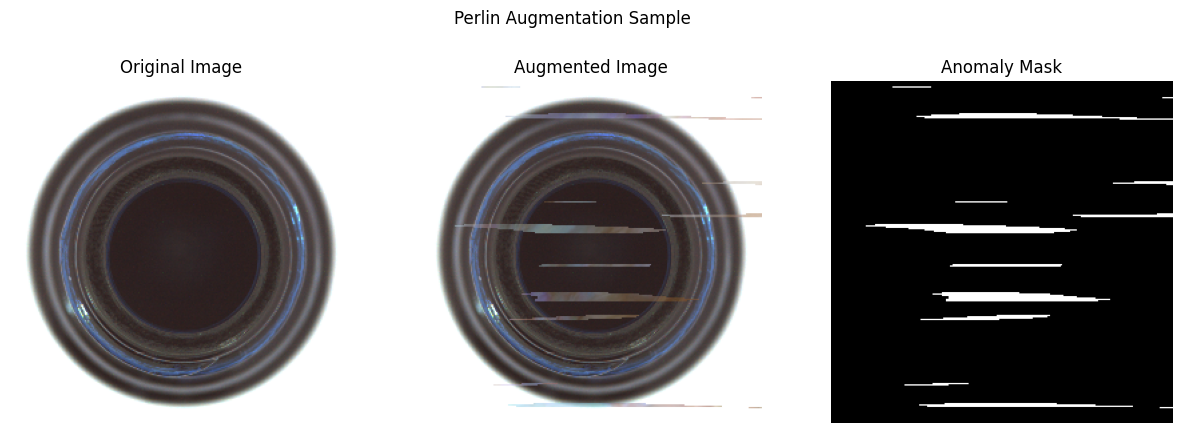

Image shape: (3, 256, 256)
Anomaly source shape: (256, 256, 3)
Perlin noise shape: (256, 256)
Perlin threshold shape: (3, 256, 256)
Augmented image shape: (3, 256, 256)
Anomaly mask shape: (256, 256)


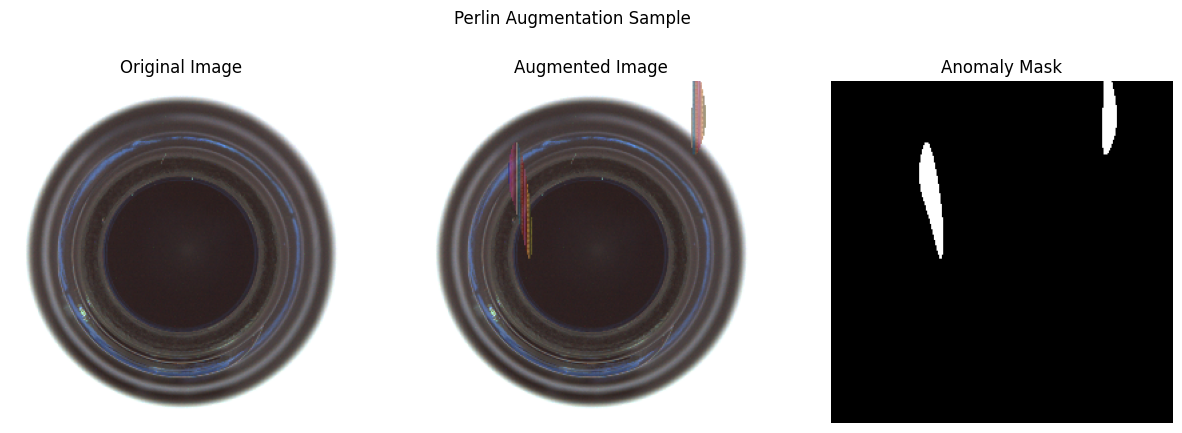

Image shape: (3, 256, 256)
Anomaly source shape: (256, 256, 3)
Perlin noise shape: (256, 256)
Perlin threshold shape: (3, 256, 256)
Augmented image shape: (3, 256, 256)
Anomaly mask shape: (256, 256)


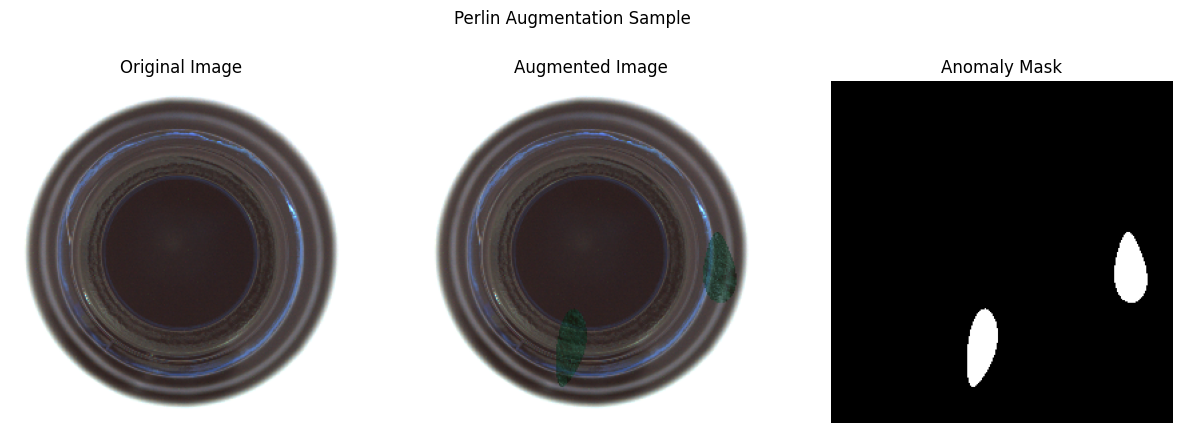

Image shape: (3, 256, 256)
Anomaly source shape: (256, 256, 3)
Perlin noise shape: (256, 256)
Perlin threshold shape: (3, 256, 256)
Augmented image shape: (3, 256, 256)
Anomaly mask shape: (256, 256)


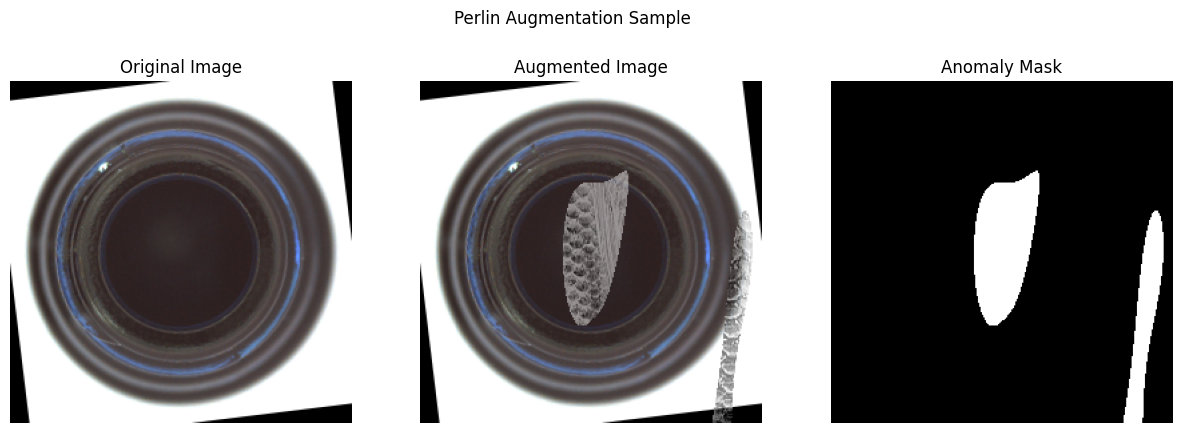

In [36]:
# Visualize Samples from Each Dataset
# Baseline Dataset
print("Baseline Dataset:")
for idx, sample in enumerate(baseline_loader):
    visualize_sample(sample, title="Baseline Sample")
    if idx == 4:  # Display first 5 samples
        break

# Perlin Dataset
print("Perlin Dataset:")
for idx, sample in enumerate(perlin_loader):
    visualize_sample(sample, title="Perlin Augmentation Sample")
    if idx == 4:  # Display first 5 samples
        break

In [106]:
def visualize_sample(sample, title="Sample"):
    """
    Visualizes a sample from the dataset.

    Args:
        sample (dict): A dictionary containing the image, augmented image, anomaly mask, and metadata.
        title (str): Title for the visualization.
    """
    # Extract data from the sample
    image = sample['image'][0]  # Remove the batch dimension
    augmented_image = sample['augmented_image'][0]  # Remove the batch dimension
    anomaly_mask = sample['anomaly_mask'][0]  # Remove the batch dimension

    # Convert tensors to NumPy arrays
    image = image.permute(1, 2, 0).cpu().numpy()  # Convert to (H, W, C) format
    augmented_image = augmented_image.permute(1, 2, 0).cpu().numpy()
    anomaly_mask = anomaly_mask.cpu().numpy().squeeze()  # Remove any singleton dimensions

    # Normalize images for visualization if necessary
    if image.max() > 1:  # If in [0, 255], normalize to [0, 1]
        image = image / 255.0
    # if augmented_image.max() > 1:  # If in [0, 255], normalize to [0, 1]
    #     augmented_image = augmented_image / 255.0

    # Plot the images
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(augmented_image)
    axes[1].set_title("Augmented Image")
    axes[1].axis("off")

    axes[2].imshow(anomaly_mask, cmap="gray")
    axes[2].set_title("Anomaly Mask")
    axes[2].axis("off")

    plt.suptitle(title)
    plt.show()


In [107]:
root_dir = "../datasets/mvtec/bottle/train/good"  # Change this to your dataset path
resize_shape = (256, 256)

In [108]:

dataset = MvtecCutPaste(root_dir=root_dir, resize_shape=resize_shape)
# print(dataset[1].shape)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
print(dataloader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Visualizing sample 1


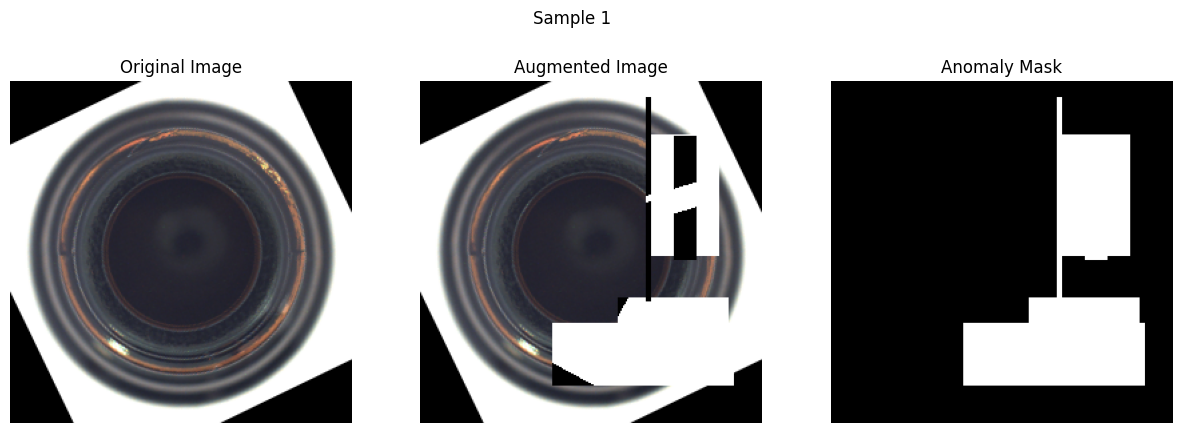

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..192.0].


Visualizing sample 2


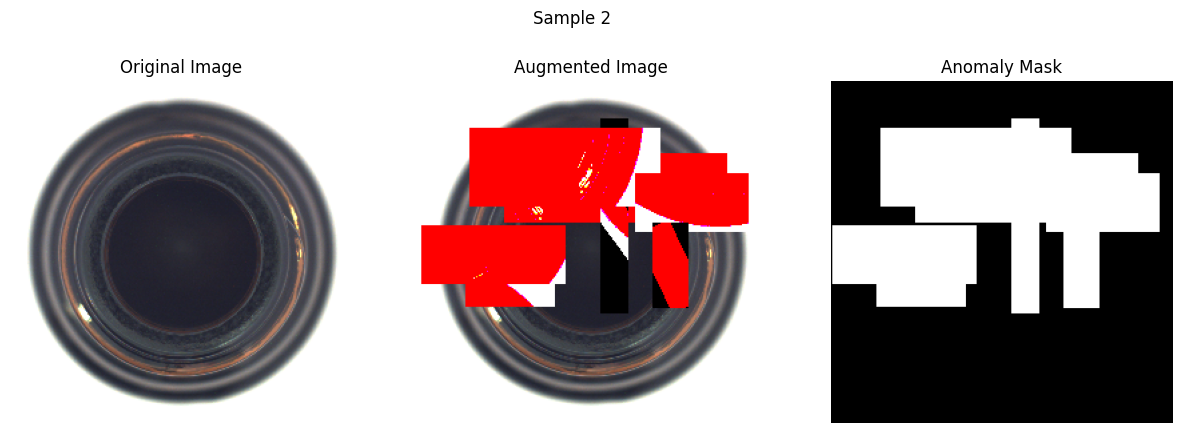

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..254.0].


Visualizing sample 3


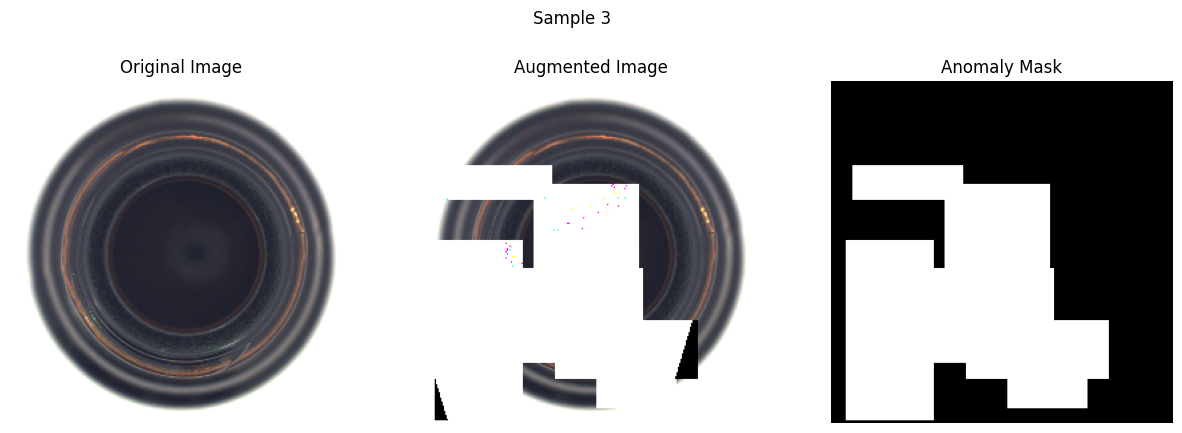

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..172.0].


Visualizing sample 4


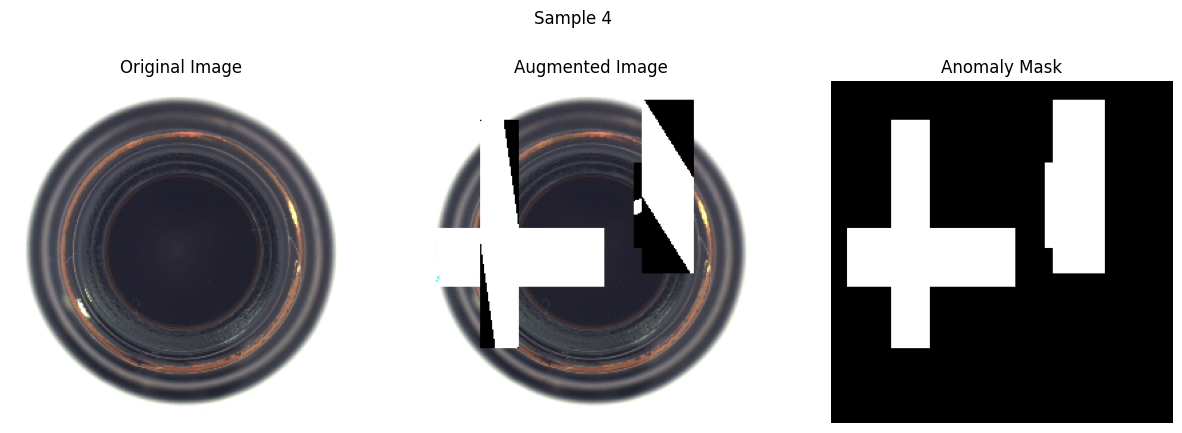

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..64.0].


Visualizing sample 5


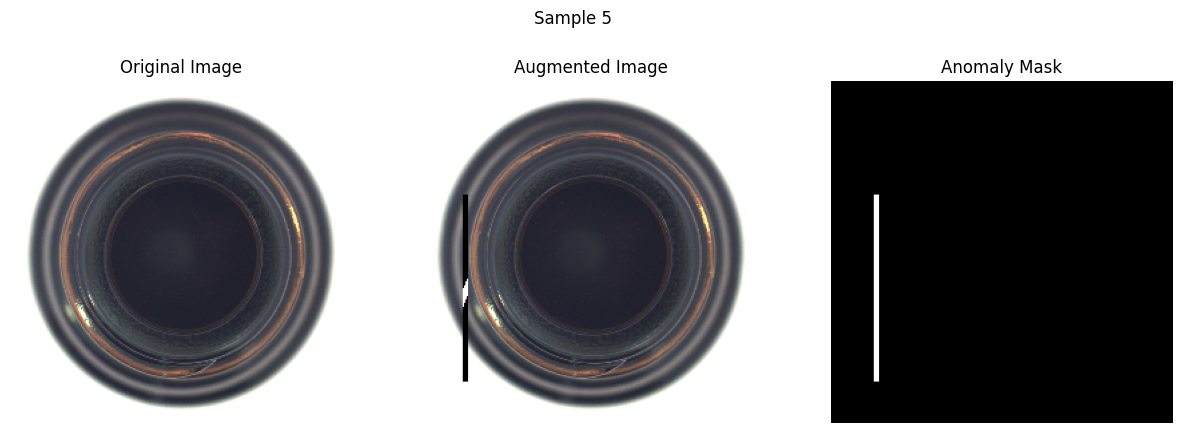

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Visualizing sample 6


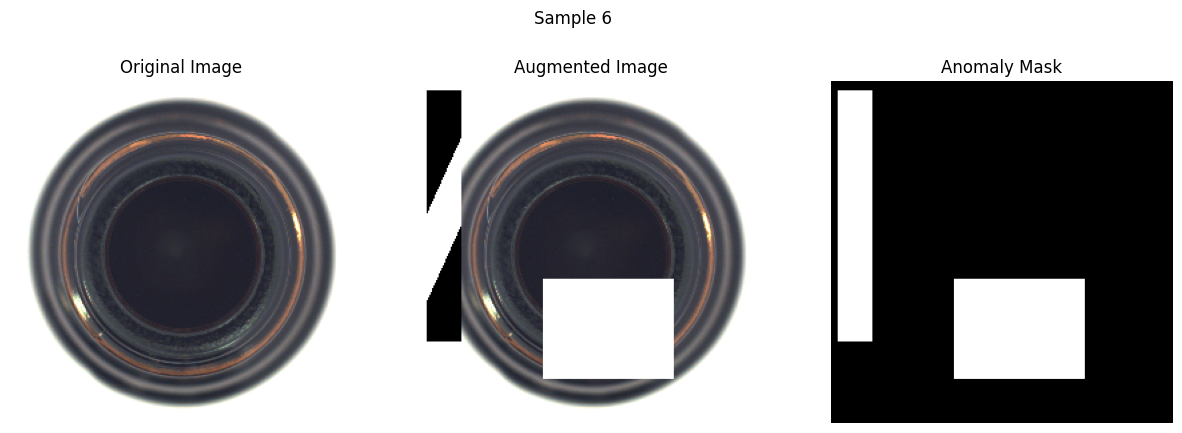

Visualizing sample 7


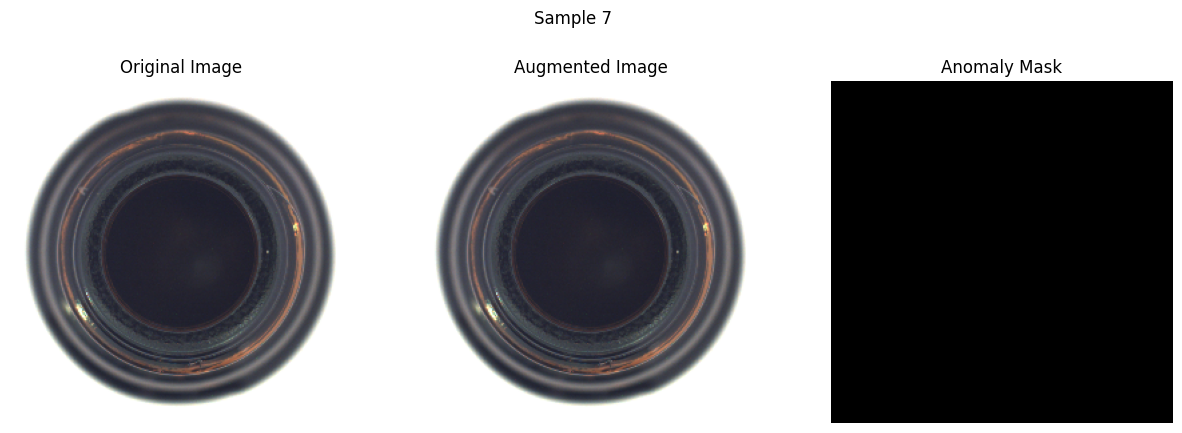

Visualizing sample 8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


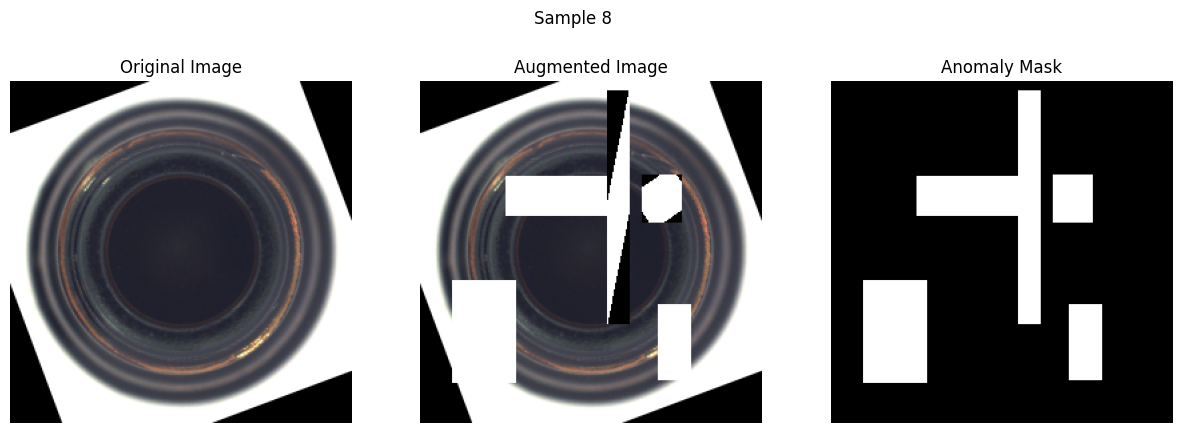

Visualizing sample 9


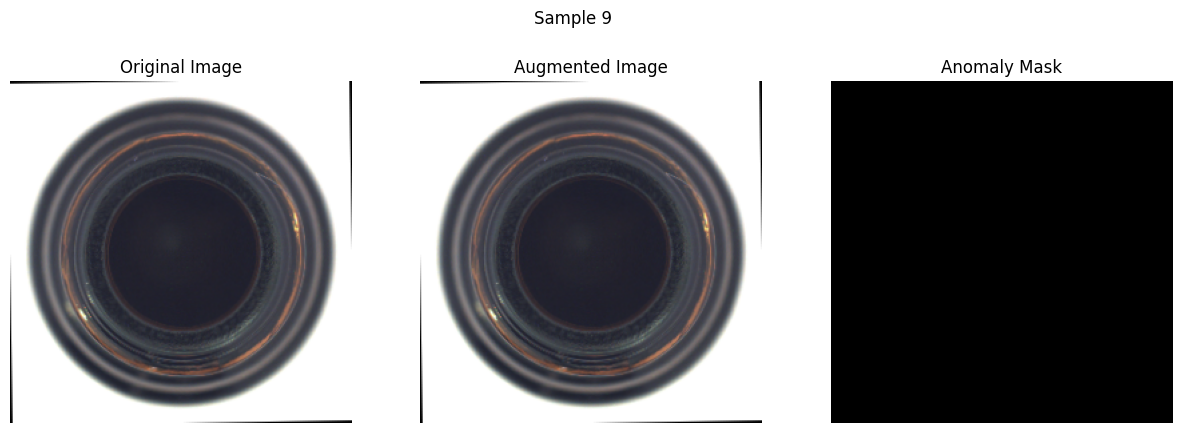

Visualizing sample 10


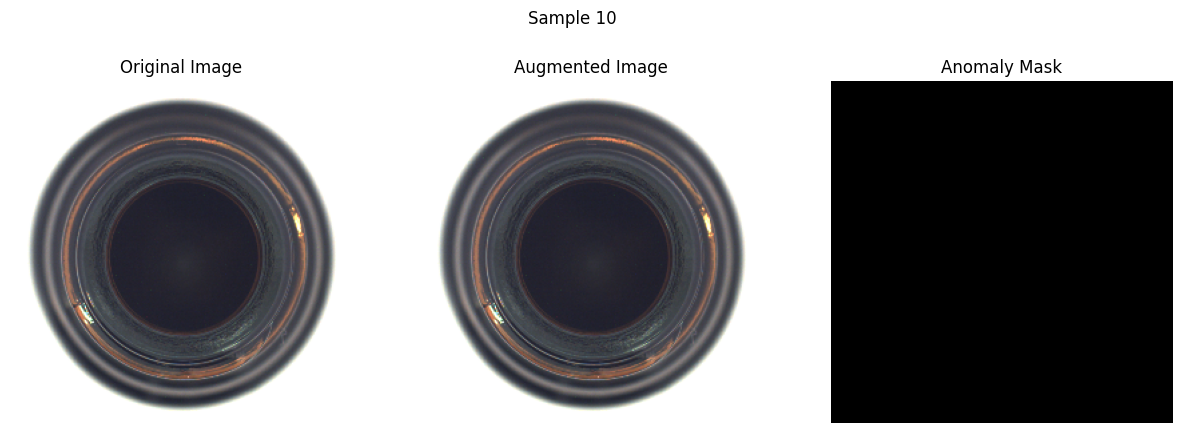

Visualizing sample 11


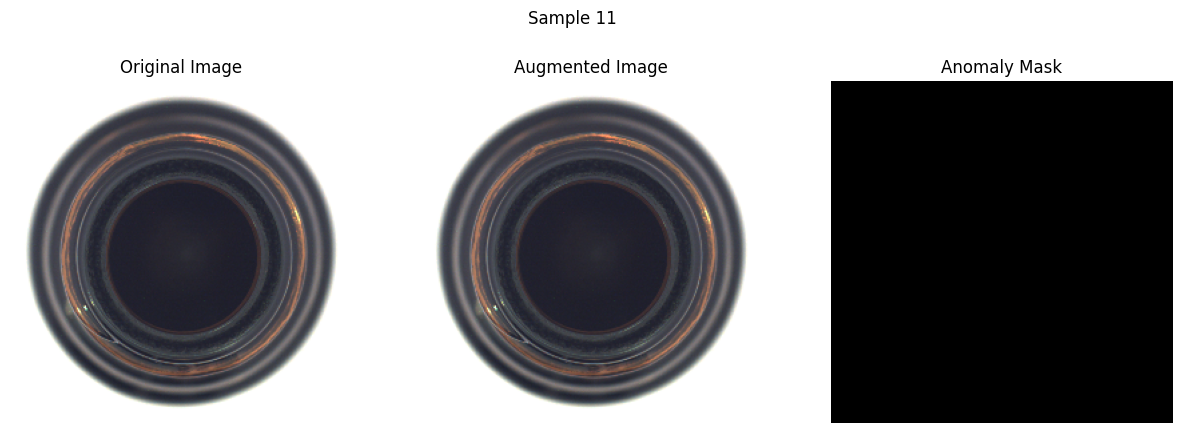

In [109]:
# Visualize samples from the dataset
for idx, sample in enumerate(dataloader):
    print(f"Visualizing sample {idx + 1}")
    visualize_sample(sample, title=f"Sample {idx + 1}")
    if idx == 10:  # Display 5 samples
        break